In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.datasets import fetch_datasets

In [3]:
plt.style.use('ggplot')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_precision_recall_curve
from yellowbrick.classifier import PrecisionRecallCurve

In [5]:
data=fetch_datasets()['protein_homo']

In [6]:
df=pd.DataFrame(data=data.data,columns=[str(i) for i in range(74)])

In [7]:
df['target']=data.target

In [8]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.3,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.0,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1


In [10]:
df['target']=df['target'].map({-1:0,1:1})

In [11]:
df['target'].value_counts()*100/len(df)

0    99.110812
1     0.889188
Name: target, dtype: float64

# Train Test Split

In [12]:
X=df.drop(columns=['target'])
y=df['target']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(102025, 74)
(43726, 74)
(102025,)
(43726,)


# Baseline Model

In [16]:
y_base_train=pd.Series(np.zeros(len(y_train)))
y_base_test=pd.Series(np.zeros(len(y_test)))

# Random Forest Model

In [17]:
rf=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=28,n_jobs=-1)

rf.fit(X_train,y_train)

#predictions
y_rf_train=rf.predict_proba(X_train)[:,1]
y_rf_test=rf.predict_proba(X_test)[:,1]

# Logistic Regression Model

In [18]:
logit=LogisticRegression(max_iter=200,random_state=28)

logit.fit(X_train,y_train)

#predictions
y_logit_train=logit.predict_proba(X_train)[:,1]
y_logit_test=logit.predict_proba(X_test)[:,1]

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Precision Recall Curve

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


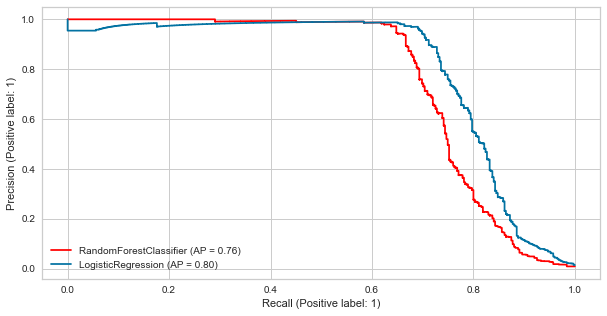

In [20]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
rf_disp=plot_precision_recall_curve(rf,X_test,y_test,ax=ax,color='red')
logit_disp=plot_precision_recall_curve(logit,X_test,y_test,ax=ax)